# Wavelength recalibration with the sky lines (Mendel OH bands)

## Introduction

Data can be recalibrated in wavelength easily when one OH sky lines are visible in most parts of the field of view. Cubes observed in the red part of the spectrum (e.g. SN3 filter) are especially interesting in this respect. 

The general idea is to extract integrated spectra at different positions in the field of view and measure the velocity of the sky lines (which should be 0 if the calibration was perfect) (see [Martin et al. 2017a](https://arxiv.org/abs/1707.01366)). 

![skymap-fig0.svg](./skymap-fig0.svg)

Then the correction map can be infered at each pixel by fitting a model.

![skymap-fig1.svg](./skymap-fig1.svg)

The calibration model is based on a simple modeling of the interferometer.

![coords0.svg](./coords0.svg)

## First step: checking the calibration

In [1]:
# inline plotting for jupyter notebook. Do not put this line in a real python script.
%matplotlib inline

In [2]:
# import base class for the manipulation of a SITELLE spectral cube: HDFCube
from orcs.process import SpectralCube
import pylab as pl

In [3]:
# load spectral cube
cube = SpectralCube('/home/thomas/M31_SN3.merged.cm1.1.0.hdf5')

17-07-19|08:42:26 # SpectralCube.__init__ > Data shape : (2048, 2064, 840)
17-07-19|08:42:26 # SpectralCube.__init__ > Cube is in WAVENUMBER (cm-1)
17-07-19|08:42:26 # SpectralCube.__init__ > Cube is CALIBRATED


 [==========] [100%] [completed in 0.028 s]                                   
Init of the parallel processing server with 4 threads
 [==========] [100%] [completed in 0.787 s]                                   


(14500, 15500)

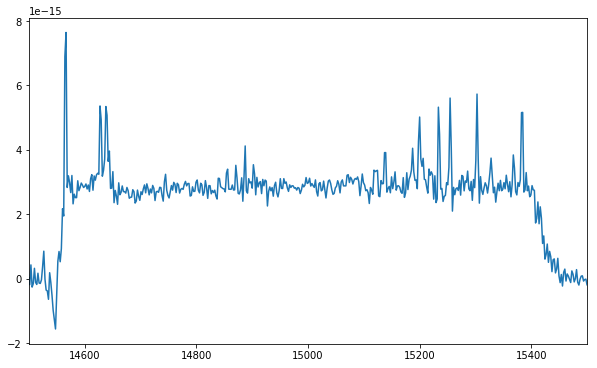

In [4]:
# extract and plot a spectrum of a large integrated region. The sky lines should appear.
axis, spectrum = cube.extract_spectrum(50, 50, 20)
pl.figure(figsize=(10,6))
pl.plot(axis, spectrum)
pl.xlim(14500, 15500)

### fitting the sky spectrum

we can also fit the integrated spectrum because there si a large number of sky lines and because we are not interested in a perfect fit (only the velocity is required), we can use a simple 'sinc' model with a fixed fwhm. All the lines are set to share the same velocity parameter and we set an inital guess of the velocity around 80 km/s. This general bias of 80 km/s is known ([Martin et al. 2017b](https://arxiv.org/abs/1706.03230)) and comes from the error made on the real wavelength of the calibration laser (which is falsely considered to be at 453.5 nm).

 [==========] [100%] [completed in 0.026 s]                                   
Init of the parallel processing server with 4 threads
 [==========] [100%] [completed in 0.729 s]                                   

===== Results ======
Velocity:  [73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6)
 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6)
 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6)
 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6)
 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6) 73.8(1.6)
 73.8(1.6)]


(14500, 15500)

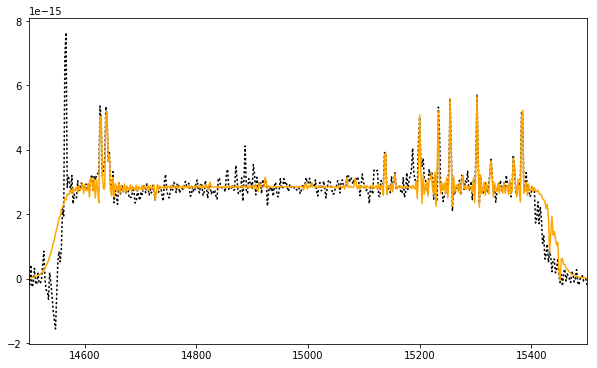

In [5]:
sky_lines_cm1 = cube.get_sky_lines()
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(50, 50, 20, sky_lines_cm1,
                                                     fmodel='sinc',
                                                     pos_def='1',
                                                     fwhm_def='fixed',
                                                     nofilter=False,
                                                     pos_cov=80)
print '\n===== Results ======'
print 'Velocity: ', fit_res['velocity_gvar']
pl.figure(figsize=(10,6))
pl.plot(axis, spectrum, ls=':', c='black')
pl.plot(axis, fit_res['fitted_vector'], ls='-', c='orange')
pl.xlim(14500, 15500)

## Second step: Mapping the sky velocity

Warning: this process can take a long time because a spectrum is extracted and fitted for each point of a 40x40 grid by default. For a basic example it is recommended to limit the number of grid division to 10x10.

17-07-19|08:42:31 # SpectralCube.map_sky_velocity > X range: 0 2048, Y range: 0 2064
17-07-19|08:42:31 # SpectralCube.map_sky_velocity > Radius: 85.3333333333
17-07-19|08:42:31 # SpectralCube.map_sky_velocity > 100 regions to fit
 loading region: Shape : circle ( Number(1861.81818),Number(1876.36364),Number(85.33333) )

17-07-19|08:42:35 # SpectralCube._fit_integrated_spectra > Fitting region 0/100
Velocity of the first line (km/s): 77.4(1.4)
17-07-19|08:42:41 # SpectralCube._fit_integrated_spectra > Fitting region 1/100
Velocity of the first line (km/s): 76.7(1.4)
17-07-19|08:42:46 # SpectralCube._fit_integrated_spectra > Fitting region 2/100
Velocity of the first line (km/s): 73.4(1.5)
17-07-19|08:42:52 # SpectralCube._fit_integrated_spectra > Fitting region 3/100
Velocity of the first line (km/s): 71.8(1.4)
17-07-19|08:42:58 # SpectralCube._fit_integrated_spectra > Fitting region 4/100
Velocity of the first line (km/s): 71.1(1.6)
17-07-19|08:43:04 # SpectralCube._fit_integrated_spec

Velocity of the first line (km/s): 82.2(2.4)
17-07-19|08:51:04 # SpectralCube._fit_integrated_spectra > Fitting region 63/100
Velocity of the first line (km/s): 76.5(3.0)
17-07-19|08:51:11 # SpectralCube._fit_integrated_spectra > Fitting region 64/100
Velocity of the first line (km/s): 79.4(2.9)
17-07-19|08:51:18 # SpectralCube._fit_integrated_spectra > Fitting region 65/100
Velocity of the first line (km/s): 71.0(2.4)
17-07-19|08:51:24 # SpectralCube._fit_integrated_spectra > Fitting region 66/100
Velocity of the first line (km/s): 76.1(1.8)
17-07-19|08:51:32 # SpectralCube._fit_integrated_spectra > Fitting region 67/100
Velocity of the first line (km/s): 79.5(1.2)
17-07-19|08:51:40 # SpectralCube._fit_integrated_spectra > Fitting region 68/100
Velocity of the first line (km/s): 80.8(1.0)
17-07-19|08:51:48 # SpectralCube._fit_integrated_spectra > Fitting region 69/100
Velocity of the first line (km/s): 84.4(1.3)
17-07-19|08:51:57 # SpectralCube._fit_integrated_spectra > Fitting region

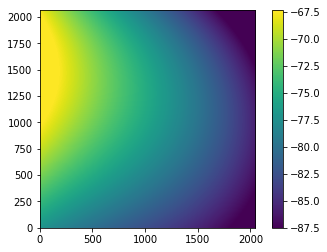

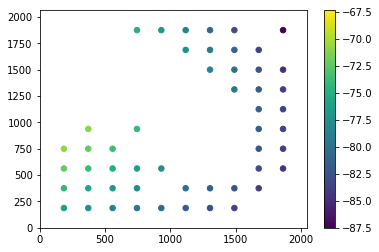

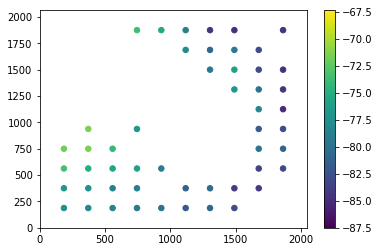

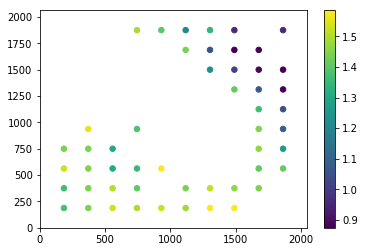

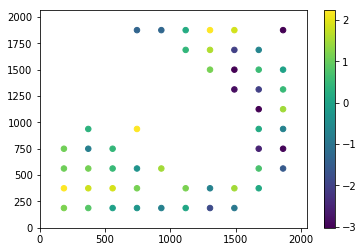

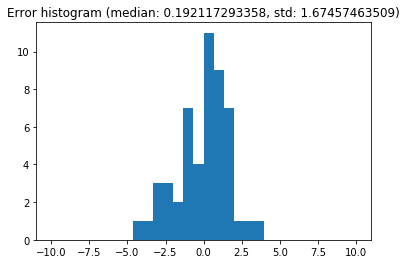

In [6]:
cube.map_sky_velocity(80, div_nb=10) # the mean velocity bias is set around 80 km/s

## Resulting data

The most important result is the skymap which gives the modelized velocity of the sky in the field of view and permit to correct the measured velocities in the cube.This map is named `*skymap.fits`. 

In this particular case this is `M31_SN3.1.0.ORCS/M31_SN3.1.0.skymap.fits`

The histogram displays the difference between the measured velocity and the fitted velocity at each valid data point.

You can see by looking at the other maps that in the cas of M31 there are some data points at the center of the field which could not give a valid velocity of the sky. This comes from the fact that M31 is very bright at the center and the sky lines are lost in the noise produced by the high continuum background. Modelling the interferometer makes possible to estimate the velocity of the lines at the center of the field where no real data has been obtained. And the result is stricking, it works particularly well even if the case of M31 ([Martin et al. 2017a](https://arxiv.org/abs/1707.01366))